In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility.
np.random.seed(123)

In [2]:
def generate_correlated_data():
    data = pd.read_csv('1k6t0a_original_joined.csv')
    return pd.DataFrame(data)

In [3]:
# num_rows = 10_000
# cluster1 = generate_correlated_data('c0', num_rows, 0.8)
# cluster2 = generate_correlated_data('c1', num_rows, 0.9)
# cluster3 = generate_correlated_data('c2', num_rows, 0.7)
orig_data = generate_correlated_data()
orig_data

,BookLoan_TABLE_loan_id,REF_TABLE_book_id,REF_TABLE_student_id,BookLoan_TABLE_loan_date,BookLoan_TABLE_return_date,Book_TABLE_title,Book_TABLE_author,Book_TABLE_isbn,REF_TABLE_library_id,Library_TABLE_name,...,Student_TABLE_date_of_birth,Student_TABLE_major,Enrollment_TABLE_enrollment_id,Enrollment_TABLE_course_id,Enrollment_TABLE_semester,Enrollment_TABLE_grade,Submission_TABLE_submission_id,Submission_TABLE_assignment_id,Submission_TABLE_submission_date,Submission_TABLE_grade
0,2,2,736,2024-02-02,2025-07-16,Kind property.,Keith Rose,978-0-373-12608-8,2,"Marshall, Adams and Davenport Library",...,1998-10-09,354,117,764,Winter 2020,F,215,415,2022-09-05 20:26:54,D
1,2,2,736,2024-02-02,2025-07-16,Kind property.,Keith Rose,978-0-373-12608-8,2,"Marshall, Adams and Davenport Library",...,1998-10-09,354,117,764,Winter 2020,F,511,29,2022-06-12 22:56:41,F
2,2,2,736,2024-02-02,2025-07-16,Kind property.,Keith Rose,978-0-373-12608-8,2,"Marshall, Adams and Davenport Library",...,1998-10-09,354,236,761,Summer 2019,F,215,415,2022-09-05 20:26:54,D
3,2,2,736,2024-02-02,2025-07-16,Kind property.,Keith Rose,978-0-373-12608-8,2,"Marshall, Adams and Davenport Library",...,1998-10-09,354,236,761,Summer 2019,F,511,29,2022-06-12 22:56:41,F
4,5,5,978,2024-06-16,2025-03-10,Stop stop very.,Lisa Stone,978-1-77393-369-6,5,"Cook, Lynch and Pugh Library",...,1996-08-12,673,998,173,Winter 2023,NaN,66,728,2022-10-18 11:22:00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,983,983,917,2024-02-20,2025-06-17,Public seek PM.,Sarah Arnold,978-1-873126-88-2,983,Blevins-Campbell Library,...,1995-07-07,579,505,787,Winter 2023,D,1103,330,2022-10-05 22:14:53,B
1117,986,986,792,2024-01-29,2024-10-24,Center fall.,Andrew Davis,978-0-510-25722-4,986,Brown LLC Library,...,1999-08-24,589,579,117,Fall 2019,F,251,840,2022-06-20 19:32:03,D
1118,986,986,792,2024-01-29,2024-10-24,Center fall.,Andrew Davis,978-0-510-25722-4,986,Brown LLC Library,...,1999-08-24,589,579,117,Fall 2019,F,887,314,2022-03-16 12:29:45,C
1119,986,986,792,2024-01-29,2024-10-24,Center fall.,Andrew Davis,978-0-510-25722-4,986,Brown LLC Library,...,1999-08-24,589,579,117,Fall 2019,F,965,886,2022-02-05 09:00:54,A


Let's visualize the correlation matrix with a heatmap.

In [4]:
# df = orig_data.copy()
# df = df.select_dtypes(include='number')
# df

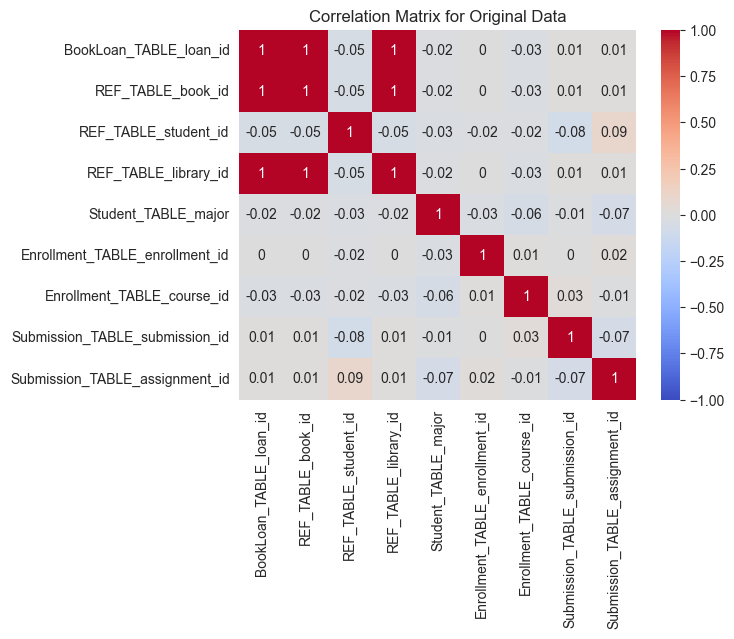

In [4]:
def show_heatmap(odf, title):
    df = odf.copy().select_dtypes(include='number')
    correlation_matrix = df.corr().round(2)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

show_heatmap(orig_data, 'Correlation Matrix for Original Data')

### SynDiffix with default clustering

Next, let us synthesize the data using SynDiffix with its default parameters.

In [6]:
from syndiffix import Synthesizer

syn_data_balanced = Synthesizer(orig_data).sample()

KeyboardInterrupt: 

In [ ]:
syn_data_balanced

In [ ]:
show_heatmap(syn_data_balanced, 'Synthetic Data (default params)')

In [5]:
from syndiffix.clustering.strategy import MlClustering
col_name = 'REF_TABLE_book_id'
syn_data_ml = Synthesizer(orig_data, clustering=MlClustering(target_column=col_name)).sample()

NameError: name 'Synthesizer' is not defined

In [8]:
show_heatmap(syn_data_ml, 'Synthetic Data (ML target c00)')

NameError: name 'syn_data_ml' is not defined

In [8]:
syn_data_ml_features_only = Synthesizer(
    orig_data,
    clustering=MlClustering(target_column=col_name, drop_non_features=True)
).sample()

show_heatmap(syn_data_ml_features_only, "Synthetic Data (ML target c00, features only)")

KeyboardInterrupt: 

In [27]:
syn_data_ml_features_only

,REF_TABLE_book_id,REF_TABLE_library_id
0,13,14
1,2,14
2,14,14
3,15,14
4,13,2
...,...,...
1116,612,615
1117,608,622
1118,608,617
1119,609,622
